In [ ]:
# https://cyc1am3n.github.io/2018/10/09/my-first-kaggle-competition_titanic.html

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set() # setting seaborn default for plots
titanic = sns.load_dataset('titanic')

In [2]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
train = pd.read_csv("data/titanic_train.csv")
test = pd.read_csv("data/titanic_test.csv")

In [4]:
def pie_chart(feature):
    feature_ratio = train[feature].value_counts(sort= False)
    feature_size = feature_ratio.size
    feature_index = feature_ratio.index
    survived = train[feature][train["survived"] == 1].value_counts()
    dead = train[train["survived"] == 0][feature].value_counts()
    
    plt.plot(aspect="auto")
    plt.pie(feature_ratio, labels= feature_index, autopct= "%0.0f%%")
    plt.title(feature + "s ratio in total")

    plt.show()
    
    for i, index in enumerate(feature_index):
            plt.subplot(1, feature_size+1, i+1, aspect="equal")
            plt.pie([survived[index], dead[index]], labels=["survived", "dead"], autopct= "%1.1f%%")
            plt.title(str(index) + "s ratio")


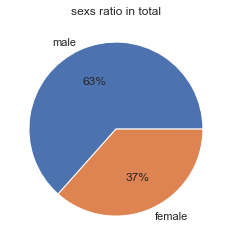

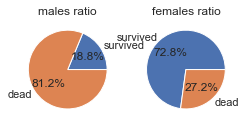

In [5]:
pie_chart("sex")


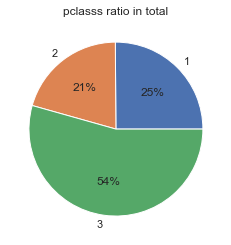

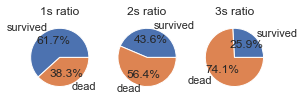

In [6]:
pie_chart("pclass")

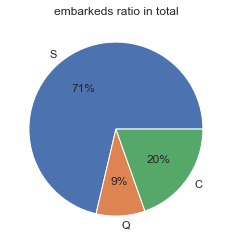

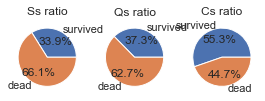

In [7]:
pie_chart("embarked")

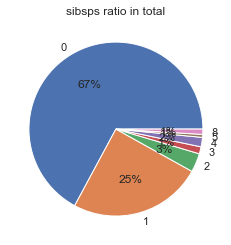

KeyError: 5

In [8]:
pie_chart("sibsp")

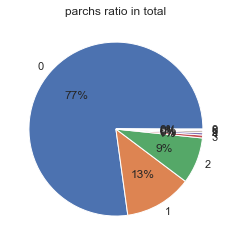

KeyError: 5

In [20]:
pie_chart("parch")

In [24]:
def bar_chart(feature):
    survived = train[train["survived"] == 1][feature].value_counts()
    dead = train[train['survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['survived','dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

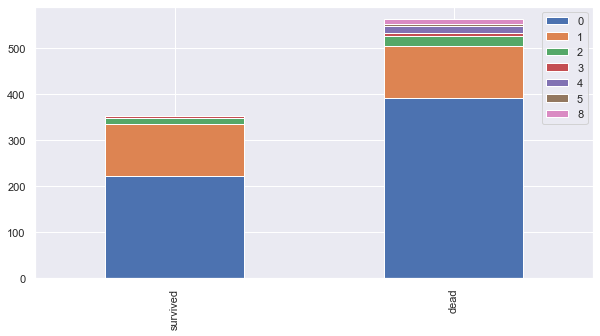

In [25]:
bar_chart("sibsp")

In [581]:
train = pd.read_csv("data/titanic_train.csv")
test = pd.read_csv("data/titanic_test.csv")
# 2개의 데이터를 합침
dataset = pd.concat([train, test], ignore_index= True) # ignore_index= True 가 없으면 index 그대로와 예로 인덱스가 123456123 
dataset.shape

(1309, 13)

In [582]:
for data in dataset:
    dataset["title"] = dataset.name.str.extract("([A-Za-z]+)\.")    
# "([A-Za-z]+)." : 공백으로 시작하고 마침표로 끝나는 문자열 추출
dataset

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest,title
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S,NaN,"England / Bennington, VT",Miss
1,2,1,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,S,NaN,"Cornwall / Akron, OH",Miss
2,2,1,"Duran y More, Miss. Florentina",female,30.0,1,0,SC/PARIS 2148,13.8583,NaN,C,NaN,"Barcelona, Spain / Havana, Cuba",Miss
3,3,0,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q,NaN,NaN,Mr
4,3,1,"Bradley, Miss. Bridget Delia",female,22.0,0,0,334914,7.7250,NaN,Q,NaN,"Kingwilliamstown, Co Cork, Ireland Glens Falls...",Miss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Karlsson, Mr. Julius Konrad Eugen",male,33.0,0,0,347465,7.8542,NaN,S,NaN,NaN,Mr
1305,2,1,"Ware, Mrs. John James (Florence Louise Long)",female,31.0,0,0,CA 31352,21.0000,NaN,S,NaN,"Bristol, England / New Britain, CT",Mrs
1306,3,1,"O'Keefe, Mr. Patrick",male,NaN,0,0,368402,7.7500,NaN,Q,NaN,NaN,Mr
1307,3,0,"Tobin, Mr. Roger",male,NaN,0,0,383121,7.7500,F38,Q,NaN,NaN,Mr


In [583]:
print(dataset.shape)
print(train.shape)
print(test.shape)

(1309, 14)
(916, 13)
(393, 13)


In [584]:
pd.crosstab(dataset["title"], dataset["sex"]) # 행, 열 형태로

sex,female,male
title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


In [585]:
print(dataset.shape)
print(train.shape)
print(test.shape)

(1309, 14)
(916, 13)
(393, 13)


In [586]:
for i in dataset:
    dataset["title"] = dataset["title"].replace(["Capt", "Col", "Countess", "Don", "Dona", "Dr", "Jonkheer", "Lady", "Major", "Rev", "Sir"], "other")
    dataset['title'] = dataset['title'].replace('Mlle', 'Miss')
    dataset['title'] = dataset['title'].replace('Mme', 'Mrs')
    dataset['title'] = dataset['title'].replace('Ms', 'Miss')

dataset[['title', 'survived']].groupby(['title'], as_index=False).mean()

,title,survived
0,Master,0.508197
1,Miss,0.678030
2,Mr,0.162483
3,Mrs,0.787879
4,other,0.379310


In [587]:
print(dataset.shape)
print(train.shape)
print(test.shape)

(1309, 14)
(916, 13)
(393, 13)


In [588]:
for i in dataset:
    dataset["title"] = dataset["title"].astype(str) # 스트링 형 변환

In [589]:
print(dataset.shape)
print(train.shape)
print(test.shape)

(1309, 14)
(916, 13)
(393, 13)


In [590]:
 dataset.embarked.value_counts(dropna=False)

S      914
C      270
Q      123
NaN      2
Name: embarked, dtype: int64

In [591]:
for i in dataset:
    dataset["embarked"] = dataset["embarked"].fillna('S')
    dataset["embarked"] = dataset["embarked"].astype(str)

In [592]:
dataset.embarked.value_counts(dropna=False)

S    916
C    270
Q    123
Name: embarked, dtype: int64

In [593]:
for i in dataset:
    dataset["age"].fillna(dataset["age"].mean(), inplace=True)
    dataset["age"] = dataset["age"].astype(int)
    dataset["ageBand"] = pd.cut(dataset["age"], 5) # cut() : age별 구간을 5구간으로 나눠

In [594]:
dataset

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest,title,ageBand
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13,0,1,250644,19.5000,NaN,S,NaN,"England / Bennington, VT",Miss,"(-0.08, 16.0]"
1,2,1,"Wells, Miss. Joan",female,4,1,1,29103,23.0000,NaN,S,NaN,"Cornwall / Akron, OH",Miss,"(-0.08, 16.0]"
2,2,1,"Duran y More, Miss. Florentina",female,30,1,0,SC/PARIS 2148,13.8583,NaN,C,NaN,"Barcelona, Spain / Havana, Cuba",Miss,"(16.0, 32.0]"
3,3,0,"Scanlan, Mr. James",male,29,0,0,36209,7.7250,NaN,Q,NaN,NaN,Mr,"(16.0, 32.0]"
4,3,1,"Bradley, Miss. Bridget Delia",female,22,0,0,334914,7.7250,NaN,Q,NaN,"Kingwilliamstown, Co Cork, Ireland Glens Falls...",Miss,"(16.0, 32.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Karlsson, Mr. Julius Konrad Eugen",male,33,0,0,347465,7.8542,NaN,S,NaN,NaN,Mr,"(32.0, 48.0]"
1305,2,1,"Ware, Mrs. John James (Florence Louise Long)",female,31,0,0,CA 31352,21.0000,NaN,S,NaN,"Bristol, England / New Britain, CT",Mrs,"(16.0, 32.0]"
1306,3,1,"O'Keefe, Mr. Patrick",male,29,0,0,368402,7.7500,NaN,Q,NaN,NaN,Mr,"(16.0, 32.0]"
1307,3,0,"Tobin, Mr. Roger",male,29,0,0,383121,7.7500,F38,Q,NaN,NaN,Mr,"(16.0, 32.0]"


In [595]:
dataset["age"] = dataset["age"].astype(int)
dataset.loc[dataset["age"] <= 16, "age"] = 0
dataset.loc[(dataset["age"] > 16) & (dataset["age"] <= 32), "age"] = 1
dataset.loc[(dataset["age"] > 32) & (dataset["age"] <= 48), "age"] = 2
dataset.loc[(dataset["age"] > 48) & (dataset["age"] <= 64), "age"] = 3
dataset.loc[dataset["age"] > 64, "age"] = 4
dataset['age'] = dataset['age'].map( { 0: 'Child',  1: 'Young', 2: 'Middle', 3: 'Prime', 4: 'Old'} ).astype(str)

In [596]:
dataset["age"].value_counts()

Young     791
Middle    265
Child     134
Prime     106
Old        13
Name: age, dtype: int64

In [597]:
dataset["fare"].value_counts(dropna= False)

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
8.1583      1
8.6542      1
12.7375     1
10.1708     1
7.1417      1
Name: fare, Length: 282, dtype: int64

In [603]:
for i in dataset:
    dataset.loc[dataset["fare"] <= 7.854, "age"] = 0
    dataset.loc[(dataset["fare"] > 7.854) & (dataset["fare"] <= 10.5), "fare"] = 1
    dataset.loc[(dataset["fare"] > 10.5) & (dataset["fare"] <= 21.679), "fare"] = 2
    dataset.loc[(dataset["fare"] > 21.679) & (dataset["fare"] <= 39.688), "fare"] = 3
    dataset.loc[dataset["fare"] > 39.688, "fare"] = 4

In [604]:
dataset["fare"].value_counts()

1.0000    275
4.0000    264
3.0000    261
2.0000    255
7.7500     55
7.7750     26
7.2292     24
7.2250     21
7.2500     18
0.0000     17
7.7958     10
7.0500      9
7.5500      8
7.7333      7
7.6500      6
7.1250      4
6.4375      3
7.8292      3
6.4958      3
7.4958      3
6.7500      2
7.0000      2
7.6292      2
7.7375      2
6.9500      2
7.7250      2
6.9750      2
7.0542      2
5.0000      1
6.2375      1
7.5792      1
7.8500      1
7.1417      1
7.7792      1
7.7208      1
7.2833      1
4.0125      1
7.8000      1
7.3125      1
7.5208      1
7.5750      1
6.8583      1
7.8208      1
7.7292      1
7.7875      1
7.7417      1
6.4500      1
3.1708      1
7.0458      1
Name: fare, dtype: int64

In [572]:
dataset

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest,title,ageBand,featureBand
0,2,1,"Mellinger, Miss. Madeleine Violet",female,Child,0,1,250644,2.000,NaN,S,NaN,"England / Bennington, VT",Miss,"(-0.08, 16.0]","(-0.512, 102.466]"
1,2,1,"Wells, Miss. Joan",female,Child,1,1,29103,3.000,NaN,S,NaN,"Cornwall / Akron, OH",Miss,"(-0.08, 16.0]","(-0.512, 102.466]"
2,2,1,"Duran y More, Miss. Florentina",female,Young,1,0,SC/PARIS 2148,2.000,NaN,C,NaN,"Barcelona, Spain / Havana, Cuba",Miss,"(16.0, 32.0]","(-0.512, 102.466]"
3,3,0,"Scanlan, Mr. James",male,0,0,0,36209,7.725,NaN,Q,NaN,NaN,Mr,"(16.0, 32.0]","(-0.512, 102.466]"
4,3,1,"Bradley, Miss. Bridget Delia",female,0,0,0,334914,7.725,NaN,Q,NaN,"Kingwilliamstown, Co Cork, Ireland Glens Falls...",Miss,"(16.0, 32.0]","(-0.512, 102.466]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Karlsson, Mr. Julius Konrad Eugen",male,Middle,0,0,347465,1.000,NaN,S,NaN,NaN,Mr,"(32.0, 48.0]","(-0.512, 102.466]"
1305,2,1,"Ware, Mrs. John James (Florence Louise Long)",female,Young,0,0,CA 31352,2.000,NaN,S,NaN,"Bristol, England / New Britain, CT",Mrs,"(16.0, 32.0]","(-0.512, 102.466]"
1306,3,1,"O'Keefe, Mr. Patrick",male,0,0,0,368402,7.750,NaN,Q,NaN,NaN,Mr,"(16.0, 32.0]","(-0.512, 102.466]"
1307,3,0,"Tobin, Mr. Roger",male,0,0,0,383121,7.750,F38,Q,NaN,NaN,Mr,"(16.0, 32.0]","(-0.512, 102.466]"
